## Also wrote an article based on this analysis - https://towardsdatascience.com/what-are-we-psychologists-e33f82bf263d

# Sentiment Analysis

- Goal is to analyze the opinion/"sentiment" of a group, e.g., analyzing opinions of news reports, movies, tweets, instagram posts, etc.


- Often applied to social media postings and consumer reviews of products and services.


An example using a set of movie reviews provided within the NLTK library

# Import libraries

In [3]:
pip install tmdbsimple

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install afinn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import urllib.request
import pandas as pd
import requests
from afinn import Afinn
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [6]:
nltk.download('all', halt_on_error=False)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/sunheepark/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/sunheepark/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/sunheepark/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/sunheepark/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/sunheepark/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/sunheepark/nltk_data...
[nltk_data]    |   Package cess_cat is alrea

[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/sunheepark/nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /Users/sunheepark/nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /Users/sunheepark/nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /Users/sunheepark/nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     /Users/sunheepark/nltk_data...
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     /Users/sunheepark/nltk_data...
[nltk_da

True

## Get API KEY

In [7]:
import tmdbsimple as tmdb
tmdb.API_KEY = input('api key= ')

api key= aecddc5aa60baa06677429e7714aace0


## Search Movie with title and released date(year)

In [8]:
search = tmdb.Search()

movies_info = search.movie(query=input('movie title= '), year=input('year= '))

movie title= parasite
year= 


In [9]:
movies_info 

{'page': 1,
 'total_results': 38,
 'total_pages': 2,
 'results': [{'popularity': 6.844,
   'vote_count': 23,
   'video': False,
   'poster_path': '/6EM7Jm3veKSW9ELMajSSxslYWDa.jpg',
   'id': 48311,
   'adult': False,
   'backdrop_path': '/AcZjBskxs7NioQOVj6DQaMbet34.jpg',
   'original_language': 'en',
   'original_title': 'Parasite',
   'genre_ids': [27, 878],
   'title': 'Parasite',
   'vote_average': 4.9,
   'overview': 'Paul Dean has created a deadly parasite that is now attached to his stomach. He and his female companion, Patricia Welles, must find a way to destroy it while also trying to avoid Ricus, his rednecks, and an evil government agent named Merchant.',
   'release_date': '1982-03-12'},
  {'popularity': 3.201,
   'id': 291545,
   'video': False,
   'vote_count': 6,
   'vote_average': 3.7,
   'title': 'Parasite',
   'release_date': '2004-01-01',
   'original_language': 'en',
   'original_title': 'Parasite',
   'genre_ids': [27],
   'backdrop_path': None,
   'adult': False,


## Put all results into the Lists

In [10]:
title=[]
id_number = []
release = []
popularity =[]

for s in search.results:
    title.append(s['title'])
    id_number.append(s['id'])
    release.append(s['release_date'])
    popularity.append(s['popularity'])

## Convert Lists into a Data Frame

In [11]:
Movie_info=pd.DataFrame(list(zip(title, id_number, popularity, release)),
                    columns=['title','id','popularity','release_date']).sort_values('release_date', ascending=False)

Movie_info=Movie_info.reset_index(drop=True)

Movie_info

,title,id,popularity,release_date
0,Parasite,496243,166.241,2019-05-30
1,The Parasite,540545,0.963,2015-11-21
2,Parasite,671137,0.600,2015-08-13
3,Parasite Memories: The Making of 'Shivers',404280,0.600,2014-10-13
4,Parasite,295057,1.076,2014-02-12
5,Parasite Choi,380120,0.600,2013-10-28
6,The Parasite Doctor Suzune: Evolution,252944,1.040,2011-12-04
7,The Parasite Doctor Suzune: Genesis,260015,1.451,2011-11-26
8,Parasite,497637,1.134,2006-04-01
9,Sexual Parasite,45676,0.943,2004-08-22


## Get Reviews from TMDb

In [12]:
Movie_review_url=[]

URL='http://api.themoviedb.org/3/movie/{0}/reviews?api_key={1}'\
.format(input('Movie id= '), 'aecddc5aa60baa06677429e7714aace0')
Movie_review_url.append(URL)
     
Movie_review_url

Movie id= 496243


['http://api.themoviedb.org/3/movie/496243/reviews?api_key=aecddc5aa60baa06677429e7714aace0']

In [13]:
url = Movie_review_url[0]
url_request = requests.get(url)

url_request

<Response [200]>

In [14]:
type(url_request)

requests.models.Response

In [15]:
data=pd.read_json(url)
data

,id,page,results,total_pages,total_results
0,496243,1,"{'author': 'SWITCH.', 'content': 'What makes ‘...",1,5
1,496243,1,"{'author': 'Sheldon Nylander', 'content': 'The...",1,5
2,496243,1,"{'author': 'Saru', 'content': 'This is VERY HI...",1,5
3,496243,1,"{'author': 'tmdb39513728', 'content': 'errbnb ...",1,5
4,496243,1,"{'author': 'Matthew Brady', 'content': '""You k...",1,5


In [16]:
# extract 'results' column  
each_results=[]
for i in range(len(data)):
    x=data.results[i]
    each_results.append(x)
each_results

[{'author': 'SWITCH.',
  'content': "What makes ‘Parasite’ so satisfying is that it commits neither error. It’s an engrossing, stylish and near perfect movie, and its underlying themes go beyond merely pointing out class exploitation to challenge the logic of capital. Though he is often juggling a mosaic of characters, themes and social issues, Bong never eschews his anarchic impulses and dark humour. It’s a movie that should be seen as widely as possible, if only so that Bong Joon-ho gets more chances to make movies for modern audiences that badly need them.\r\n- Jake Watt\r\n\r\nRead Jake's full article...\r\nhttps://www.maketheswitch.com.au/article/review-parasite-a-bloodthirsty-and-very-funny-look-at-class-warfare\r\n\r\nHead to https://www.maketheswitch.com.au/sff for more Sydney Film Festival reviews.",
  'id': '5d060140c3a36832f220dedd',
  'url': 'https://www.themoviedb.org/review/5d060140c3a36832f220dedd'},
 {'author': 'Sheldon Nylander',
  'content': 'The working class and dow

In [17]:
# extract content(review) only
reviews=[]
for i in range(len(each_results)):
    RV = each_results[i]['content']
    reviews.append(RV)
    
reviews

["What makes ‘Parasite’ so satisfying is that it commits neither error. It’s an engrossing, stylish and near perfect movie, and its underlying themes go beyond merely pointing out class exploitation to challenge the logic of capital. Though he is often juggling a mosaic of characters, themes and social issues, Bong never eschews his anarchic impulses and dark humour. It’s a movie that should be seen as widely as possible, if only so that Bong Joon-ho gets more chances to make movies for modern audiences that badly need them.\r\n- Jake Watt\r\n\r\nRead Jake's full article...\r\nhttps://www.maketheswitch.com.au/article/review-parasite-a-bloodthirsty-and-very-funny-look-at-class-warfare\r\n\r\nHead to https://www.maketheswitch.com.au/sff for more Sydney Film Festival reviews.",
 'The working class and down on their luck Kim family struggle to make ends meet. When a friend of the son, Ki-Woo’s, who is an English tutor for the daughter in the wealthy Park family, has to leave his position, 

In [18]:
tokens=[]
for i in range(len(reviews)):
    sentence = reviews[i] 
    token = nltk.word_tokenize(sentence) 
    tokens.append(token)
    
tokens

[['What',
  'makes',
  '‘',
  'Parasite',
  '’',
  'so',
  'satisfying',
  'is',
  'that',
  'it',
  'commits',
  'neither',
  'error',
  '.',
  'It',
  '’',
  's',
  'an',
  'engrossing',
  ',',
  'stylish',
  'and',
  'near',
  'perfect',
  'movie',
  ',',
  'and',
  'its',
  'underlying',
  'themes',
  'go',
  'beyond',
  'merely',
  'pointing',
  'out',
  'class',
  'exploitation',
  'to',
  'challenge',
  'the',
  'logic',
  'of',
  'capital',
  '.',
  'Though',
  'he',
  'is',
  'often',
  'juggling',
  'a',
  'mosaic',
  'of',
  'characters',
  ',',
  'themes',
  'and',
  'social',
  'issues',
  ',',
  'Bong',
  'never',
  'eschews',
  'his',
  'anarchic',
  'impulses',
  'and',
  'dark',
  'humour',
  '.',
  'It',
  '’',
  's',
  'a',
  'movie',
  'that',
  'should',
  'be',
  'seen',
  'as',
  'widely',
  'as',
  'possible',
  ',',
  'if',
  'only',
  'so',
  'that',
  'Bong',
  'Joon-ho',
  'gets',
  'more',
  'chances',
  'to',
  'make',
  'movies',
  'for',
  'modern',
  'a

## Removing Stopwords from Text

In [19]:
from nltk.corpus import stopwords

en_stops = set(stopwords.words('english'))

len(en_stops)

179

In [20]:
word_list=[]
for i in range(len(tokens)):
    word_list.append([word for word in tokens[i] if word not in en_stops])

word_list

[['What',
  'makes',
  '‘',
  'Parasite',
  '’',
  'satisfying',
  'commits',
  'neither',
  'error',
  '.',
  'It',
  '’',
  'engrossing',
  ',',
  'stylish',
  'near',
  'perfect',
  'movie',
  ',',
  'underlying',
  'themes',
  'go',
  'beyond',
  'merely',
  'pointing',
  'class',
  'exploitation',
  'challenge',
  'logic',
  'capital',
  '.',
  'Though',
  'often',
  'juggling',
  'mosaic',
  'characters',
  ',',
  'themes',
  'social',
  'issues',
  ',',
  'Bong',
  'never',
  'eschews',
  'anarchic',
  'impulses',
  'dark',
  'humour',
  '.',
  'It',
  '’',
  'movie',
  'seen',
  'widely',
  'possible',
  ',',
  'Bong',
  'Joon-ho',
  'gets',
  'chances',
  'make',
  'movies',
  'modern',
  'audiences',
  'badly',
  'need',
  '.',
  '-',
  'Jake',
  'Watt',
  'Read',
  'Jake',
  "'s",
  'full',
  'article',
  '...',
  'https',
  ':',
  '//www.maketheswitch.com.au/article/review-parasite-a-bloodthirsty-and-very-funny-look-at-class-warfare',
  'Head',
  'https',
  ':',
  '//www.ma

In [21]:
word_string=[]
for i in range(len(word_list)):
    word_str=','.join(word_list[i])
    word_string.append(word_str)

afinn_score=[]
for i in range(len(word_string)):
    afinn=Afinn()
    afinn_score.append(afinn.score(word_string[i]))
    
afinn_score=pd.DataFrame(data=afinn_score, columns=['sentiment score'])
afinn_score

,sentiment score
0,7.0
1,30.0
2,1.0
3,26.0
4,41.0


# NRC

https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm \
\- Non-Commercial Research Use

In [22]:
NRC=pd.read_csv('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt',header=None,sep='\t')
NRC

,0,1,2
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
...,...,...,...
141815,zoom,negative,0
141816,zoom,positive,0
141817,zoom,sadness,0
141818,zoom,surprise,0


In [23]:
NRC=NRC[(NRC !=0).all(1)]
NRC=NRC.reset_index(drop=True)
NRC

,0,1,2
0,abacus,trust,1
1,abandon,fear,1
2,abandon,negative,1
3,abandon,sadness,1
4,abandoned,anger,1
...,...,...,...
13896,zest,anticipation,1
13897,zest,joy,1
13898,zest,positive,1
13899,zest,trust,1


In [24]:
tokenizer=RegexpTokenizer('[\w]+')
stop_words=stopwords.words('english')
p_stemmer=PorterStemmer()

In [25]:
raw_string=[]
for i in word_string:
    raw_string.append(i.lower())

raw_string

["what,makes,‘,parasite,’,satisfying,commits,neither,error,.,it,’,engrossing,,,stylish,near,perfect,movie,,,underlying,themes,go,beyond,merely,pointing,class,exploitation,challenge,logic,capital,.,though,often,juggling,mosaic,characters,,,themes,social,issues,,,bong,never,eschews,anarchic,impulses,dark,humour,.,it,’,movie,seen,widely,possible,,,bong,joon-ho,gets,chances,make,movies,modern,audiences,badly,need,.,-,jake,watt,read,jake,'s,full,article,...,https,:,//www.maketheswitch.com.au/article/review-parasite-a-bloodthirsty-and-very-funny-look-at-class-warfare,head,https,:,//www.maketheswitch.com.au/sff,sydney,film,festival,reviews,.",
 "the,working,class,luck,kim,family,struggle,make,ends,meet,.,when,friend,son,,,ki-woo,’,,,english,tutor,daughter,wealthy,park,family,,,leave,position,,,recommends,ki-woo,job,.,now,``,'',wealthy,family,,,kims,begin,plotting,downfall,current,household,servants,inserting,vacant,positions,,,making,gainfully,employed,money,finally,flowing,household,.,but,ev

In [29]:
for i in range(len(raw_string)):
    tokens=tokenizer.tokenize(raw_string[i])
    stopped_tokens=[t for t in tokens if not t in stop_words]
    match_words=[x for x in stopped_tokens if x in list(NRC[0])]
    
emotion=[]
for i in match_words:
    temp=list(NRC.iloc[np.where(NRC[0]==i)[0],1])
    for j in temp:
        emotion.append(j)

sentiment_result=pd.Series(emotion).value_counts()
sentiment_result=pd.DataFrame(sentiment_result, columns=[' '])
sentiment_result

,
positive,27
trust,18
joy,16
negative,14
fear,10
anticipation,10
surprise,9
sadness,8
disgust,7
anger,6


Text(0.5, 1.0, 'Parasite Reviews')

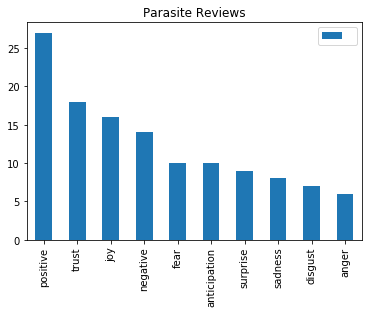

In [30]:
sentiment_result.plot.bar().set_title('Parasite Reviews')